In [1]:
from keras.datasets import imdb
import numpy as np

from keras import models
from keras import layers

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=6000) #6k most freq occuring words

In [4]:
max([max(sequence) for sequence in train_data]) # longest seq

5999

In [5]:
def vectorize_sequences(sequences, dimension=6000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [6]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
X_val = X_train[:3000]
X_train = X_train[3000:]
y_val = y_train[:3000]
y_train = y_train[3000:]

In [8]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(6000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val,y_val))

Train on 22000 samples, validate on 3000 samples
Epoch 1/20
22000/22000 [==============================] - 7s 323us/step - loss: 0.4363 - accuracy: 0.8071 - val_loss: 0.3119 - val_accuracy: 0.8760
Epoch 2/20
22000/22000 [==============================] - 11s 513us/step - loss: 0.2673 - accuracy: 0.8948 - val_loss: 0.2763 - val_accuracy: 0.8880
Epoch 3/20
22000/22000 [==============================] - 11s 515us/step - loss: 0.2135 - accuracy: 0.9167 - val_loss: 0.2767 - val_accuracy: 0.8863
Epoch 4/20
22000/22000 [==============================] - 7s 340us/step - loss: 0.1843 - accuracy: 0.9277 - val_loss: 0.2941 - val_accuracy: 0.8837
Epoch 5/20
22000/22000 [==============================] - 9s 427us/step - loss: 0.1501 - accuracy: 0.9431 - val_loss: 0.3244 - val_accuracy: 0.8807
Epoch 6/20
22000/22000 [==============================] - 12s 537us/step - loss: 0.1307 - accuracy: 0.9515 - val_loss: 0.3378 - val_accuracy: 0.8787
Epoch 7/20
22000/22000 [==============================] - 7s

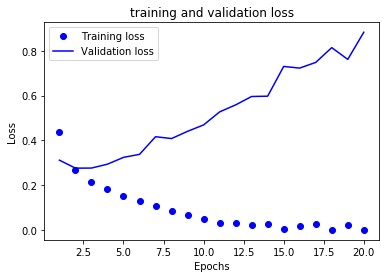

In [10]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

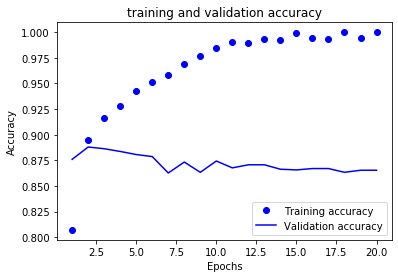

In [11]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

There is clear overfitting because the validation loss is not exponentially nor linearily decreasing function. **Decreasing the amount of epochs can help.**

In [12]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(6000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, epochs=4, batch_size=256)
results = model.evaluate(X_val, y_val)
results

Epoch 1/4
22000/22000 [==============================] - 9s 428us/step - loss: 0.0415 - accuracy: 0.9869
Epoch 2/4
22000/22000 [==============================] - 10s 450us/step - loss: 0.0268 - accuracy: 0.9920
Epoch 3/4
22000/22000 [==============================] - 9s 419us/step - loss: 0.0201 - accuracy: 0.9947
Epoch 4/4
3000/3000 [==============================] - 2s 555us/step


[0.8358685154914856, 0.8633333444595337]

A fairly naive approach gives us an accuracy of ```0.8633333444595337```